<a href="https://colab.research.google.com/github/Beccacec/FDS-Final-Project/blob/Lorenzo/2_FDS_final_project_Lorenzo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


We select specific features in order to find out which of them can affect the price of the property.
So we choose features like "id", "name", "neighbourhood" (because some of them are not in specifically in the city of Rome"), "price" and others that seemed interesting for this analysis.

In [3]:
features_price = ["id","name","neighbourhood","neighbourhood_cleansed","latitude","longitude","property_type","room_type","bedrooms","beds","amenities","price","number_of_reviews_ltm","review_scores_rating"]

In [4]:
df = pd.read_csv("/content/drive/MyDrive/FDS_final_project/listings.csv", usecols = features_price)
df.head()

,id,name,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,bedrooms,beds,amenities,price,number_of_reviews_ltm,review_scores_rating
0,17629440,ISOLA DEL CUORE,"Ciampino, Lazio, Italy",VII San Giovanni/Cinecittà,41.78984,12.60899,Private room in rental unit,Private room,1.0,1.0,"[""Heating"", ""Shampoo"", ""Cleaning products"", ""H...",$45.00,8,4.74
1,2737,"Elif's room in cozy, clean flat.","Rome, Lazio, Italy",VIII Appia Antica,41.87136,12.48215,Private room,Private room,1.0,1.0,"[""First aid kit"", ""Heating"", ""Elevator"", ""Wifi...",$50.00,0,4.80
2,103870,CASACHICA Your holiday home in Rome,NaN,I Centro Storico,41.89711,12.50423,Entire rental unit,Entire home/apt,1.0,2.0,"[""Air conditioning"", ""Heating"", ""Lockbox"", ""Mi...",$78.00,30,4.11
3,2903,Stay a night in Calisto6 B&B Rome,NaN,I Centro Storico,41.88824,12.46953,Private room in bed and breakfast,Private room,1.0,2.0,"[""Air conditioning"", ""First aid kit"", ""Heating...",$164.00,0,4.28
4,104339,Colorful apartment close MetroB,"Rome, Lazio, Italy",VIII Appia Antica,41.85585,12.48361,Entire rental unit,Entire home/apt,1.0,2.0,"[""Heating"", ""Paid parking off premises"", ""Lugg...",$80.00,0,5.00


Deleting NaN values in the dataframe

In [5]:
df = df.dropna()

We want to consider only properties in the city of Rome and not the ones from Rome area but outside the city.

In [6]:
df = df.drop(df[~df['neighbourhood'].str.contains('Rome')].index)


We replace the symbol "$" with a space in the column referring to the price.

In [7]:
df["price"] = df["price"].str.replace('$','',regex = True)

We want to remove comma from the prices

In [8]:
df["price"] = df["price"].str.replace(",","",regex= True)

In [9]:
price = df["price"]
price = price.astype(float)
df.update(price)

In [ ]:
df.head()

In [11]:
x = df["bedrooms"].to_numpy().reshape((-1,1))
y = df["price"].to_numpy()

In [12]:
model = LinearRegression().fit(x,y)

In [13]:
r_sq = model.score(x,y)

In [14]:
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.06570833814349086


The coefficient of determination is really low. That means that there is a lack of correlation and that the model probably is not a good fit for the data.
We want to check the residual plots to be sure to have unbiased estimates. 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


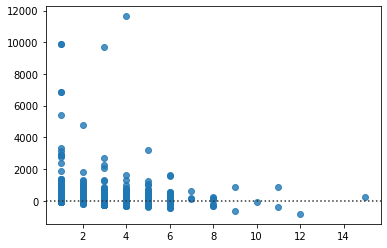

In [23]:
sns.residplot(x, y, data=df)

The plot doesn't show a random distribution around the line at zero, so it means that the model is biased and it's necessary to use a different model.